### 데이터셋에 맞는 모델 선정 


In [1]:
import pandas as pd

X_train = pd.read_csv("data/X_train.csv").drop(columns=["Name", "group"])
y_train = pd.read_csv("data/y_train.csv")

In [10]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer


# encoder
categorical_preprocessor = OrdinalEncoder()
numerical_preprocessor = StandardScaler()

# split numerical & categorical data
numerical_columns_selector = selector(dtype_exclude=["object", "bool"])
categorical_columns_selector = selector(dtype_include=["object", "bool"])
numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

preprocessor = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
    ]
)


### Randomforest 모델 GridSearch


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200, 300, 400],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [6, 8, 10, 12, 14, 16],
    "criterion": ["gini", "entropy"],
}
rfc = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
)

X_new = preprocessor.fit_transform(X_train)
CV_rfc.fit(X_new, y_train.values.ravel())

print("tuned hpyerparameters :(best parameters) ", CV_rfc.best_params_)
print("acc :", CV_rfc.best_score_)
print("\n")


tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}
acc : 0.8041252759381898




### LogisticRegression 모델 GridSearch


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings

warnings.filterwarnings("ignore")

grid = {"C": np.logspace(-3, 3, 10), "penalty": ["none", "l2", "l1"]}
rfc = LogisticRegression()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=grid, cv=5)

X_new = preprocessor.fit_transform(X_train)
CV_rfc.fit(X_new, y_train.values.ravel())

print("tuned hpyerparameters :(best parameters) ", CV_rfc.best_params_)
print("f1-score(macro) :", CV_rfc.best_score_)
print("\n")


tuned hpyerparameters :(best parameters)  {'C': 2.154434690031882, 'penalty': 'l2'}
f1-score(macro) : 0.7846338264384622




### 모델 평가


### RandomForest 모델 평가


In [4]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import pandas as pd

### Column transformer
# encoder
categorical_preprocessor = OrdinalEncoder()
numerical_preprocessor = StandardScaler()

# train data
X_train = pd.read_csv("data/X_train.csv").drop(columns=["Name", "group"])
y_train = pd.read_csv("data/y_train.csv")

# split numerical & categorical data
numerical_columns_selector = selector(dtype_exclude=["object", "bool"])
categorical_columns_selector = selector(dtype_include=["object", "bool"])
numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

preprocessor = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
    ]
)


### Encoding
preprocessor_fit = preprocessor.fit(X_train, y_train)
X_new = preprocessor_fit.transform(X_train)


### Modeling
params = {"criterion": "gini", "max_depth": 12, "max_features": "auto", "n_estimators": 100}
rfc = RandomForestClassifier(**params, random_state=42)
rfc.fit(X_new, y_train.values.ravel())

### Testing
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

X_new = preprocessor_fit.transform(X_test)
y_predict = rfc.predict(X_new)


# Metric
print("accuracy_score : ", accuracy_score(y_test.values.ravel(), y_predict))


accuracy_score :  0.8161875945537065


accuracy_score 0.8161875945537065


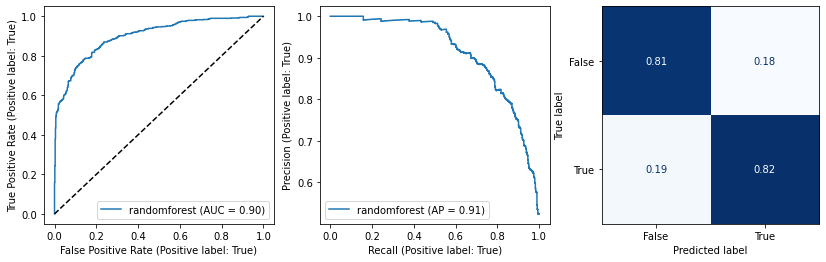

In [5]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))


print("accuracy_score", accuracy_score(y_test.values.ravel(), y_predict))

RocCurveDisplay.from_estimator(rfc, X_new, y_test.values.ravel(), name="randomforest", ax=axes[0])
axes[0].plot([0, 1], [0, 1], "k--")
PrecisionRecallDisplay.from_estimator(
    rfc, X_new, y_test.values.ravel(), name="randomforest", ax=axes[1]
)
ConfusionMatrixDisplay.from_estimator(
    rfc,
    X_new,
    y_test.values.ravel(),
    ax=axes[2],
    cmap=plt.cm.Blues,
    normalize="pred",
    colorbar=False,
)
plt.show()


### Logistic Regression 모델 평가


In [6]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import pandas as pd

### Column transformer
# encoder
categorical_preprocessor = OrdinalEncoder()
numerical_preprocessor = StandardScaler()

# train data
X_train = pd.read_csv("data/X_train.csv").drop(columns=["Name", "group"])
y_train = pd.read_csv("data/y_train.csv")

# split numerical & categorical data
numerical_columns_selector = selector(dtype_exclude=["object", "bool"])
categorical_columns_selector = selector(dtype_include=["object", "bool"])
numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

preprocessor = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
    ]
)

### Encoding
preprocessor_fit = preprocessor.fit(X_train, y_train)
X_new = preprocessor_fit.transform(X_train)


### Modeling
params = {"C": 2.154434690031882, "penalty": "l2"}
lg = LogisticRegression(**params)
lg.fit(X_new, y_train.values.ravel())

### Testing
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

X_new = preprocessor_fit.transform(X_test)
y_predict = lg.predict(X_new)


# Metric
print("accuracy_score : ", accuracy_score(y_test.values.ravel(), y_predict))


accuracy_score :  0.773071104387292


accuracy_score 0.773071104387292


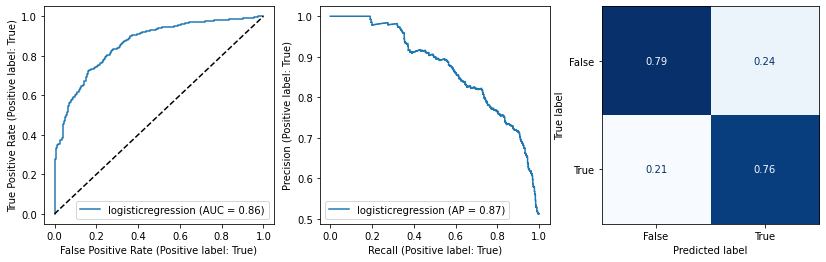

In [7]:
from sklearn.metrics import (
    PrecisionRecallDisplay,
    RocCurveDisplay,
    ConfusionMatrixDisplay,
    accuracy_score,
)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))


print("accuracy_score", accuracy_score(y_test.values.ravel(), y_predict))

RocCurveDisplay.from_estimator(
    lg, X_new, y_test.values.ravel(), name="logisticregression", ax=axes[0]
)
axes[0].plot([0, 1], [0, 1], "k--")
PrecisionRecallDisplay.from_estimator(
    lg, X_new, y_test.values.ravel(), name="logisticregression", ax=axes[1]
)
ConfusionMatrixDisplay.from_estimator(
    lg,
    X_new,
    y_test.values.ravel(),
    ax=axes[2],
    cmap=plt.cm.Blues,
    normalize="pred",
    colorbar=False,
)
plt.show()


### Pipeline 구성 및 RandomForest 모델 저장

In [8]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import pandas as pd

### Column transformer
# encoder
categorical_preprocessor = OrdinalEncoder()
numerical_preprocessor = StandardScaler()

# train_data
X_train = pd.read_csv("data/X_train.csv").drop(columns=["Name", "group"])
y_train = pd.read_csv("data/y_train.csv")

# split numerical & categorical data
numerical_columns_selector = selector(dtype_exclude=["object", "bool"])
categorical_columns_selector = selector(dtype_include=["object", "bool"])
numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

preprocessor = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
    ]
)

### pipeline

# Metric
params = {"criterion": "gini", "max_depth": 12, "max_features": "auto", "n_estimators": 100}
pipe = Pipeline(
    steps=[
        ("column_transformer", preprocessor),
        ("Model", RandomForestClassifier(**params, random_state=42)),
    ]
)
pipe.fit(X_train, y_train.values.ravel())


### Testing
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

print("accuracy_score : ", accuracy_score(y_test.values.ravel(), pipe.predict(X_test)))

accuracy_score :  0.8161875945537065


In [9]:
import joblib
joblib.dump(pipe,"models/random_forest.pkl")

['models/random_forest.pkl']